GENERACIÓN DE DATASET CON SERIES TEMPORALES UNIVARIABLES

GENERACIÓN DE SERIES TEMPORALES

In [2]:
import pandas as pd
import numpy as np

In [3]:
# A partir de una fecha de inicio y fecha de fin, devuelve la serie temporal desde la fecha de inicio a la fecha de fin con frequencias posibles:
# B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds

def series_inicio_fin(inicio, fin,freq):
    serie = pd.date_range(start=inicio, end=fin, freq=freq)
    return serie 

In [4]:
# A partir de una fecha de inicio y el número de periodos, devuelve la serie temporal desde la fecha de inicio a la fecha de fin con frequencias posibles:
# B business day frequency, D calendar day frequency, W weekly frequency, M monthly frequency, Q quarterly frequency, Y yearly frequency, h hourly frequency, min minutely frequency, s secondly frequency, ms milliseconds, us microseconds, ns nanoseconds

def series_inicio_periodos(inicio, periodos, freq): 
    serie = pd.date_range(start=inicio, periods=periodos, freq=freq)
    return serie

GENERACIÓN DE DATAFRAMES SEGÚN DISTINTAS DISTRIBUCIONES

DATAFRAME SEGÚN UNA DISTRIBUCIÓN NORMAL

In [5]:
# A partir de la fecha de inicio, fin, frequencia, columnas, media y desviación tipica, devuelve un dataframe con la serie temporal, lass columnas y con los datos obtenidos a partir de la distribución normal con esa media y desviación

def df_normal_fin(inicio,fin,freq,columna,media,desv_tipica):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = np.random.normal(media,desv_tipica,num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [6]:
# A partir de la fecha de inicio, periodos, frequencia, columnas, media y desviación tipica, devuelve un dataframe con la serie temporal, lass columnas y con los datos obtenidos a partir de la distribución normal con esa media y desviación

def df_normal_periodos(inicio,periodos,freq,columna,media,desv_tipica):   
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = np.random.normal(media,desv_tipica,periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [7]:
from scipy.stats import binom,poisson,geom,hypergeom,uniform,expon, gamma, beta,chi2,t,pareto,lognorm

DATFRAME SEGÚN UNA DISTRIBUCIÓN NORMAL Y LUEGO CAMBIOS

In [8]:
def df_normal_fin_drift(inicio,fin1,fin2,freq,columna,media,desv_tipica,drift,param_drift):
    ind1 = series_inicio_fin(inicio,fin1,freq)
    ind2 = series_inicio_fin(fin1,fin2,freq)
    inidice = series_inicio_fin(inicio,fin2,freq)
    datos1=np.random.normal(media,desv_tipica,ind1.size)
    if drift == 1 :
        datos2 = np.random.normal(param_drift[0],param_drift[1],ind2.size)
    elif drift ==2 :
        if len(param_drift)==2:
            datos2 = binom.rvs(param_drift[0],param_drift[1],size=ind2.size)
        elif len(param_drift) == 3:
            datos2 = binom.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
    elif drift== 3 :
        if len(param_drift)==1:
            datos2 = poisson.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = poisson.rvs(param_drift[0],param_drift[1],size=ind2.size)
    elif drift == 4 :
        if len(param_drift)==1:
            datos2 = geom.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = geom.rvs(param_drift[0],param_drift[1],size=ind2.size)
    elif drift == 5:
        if len(param_drift)==3:
            datos2 = binom.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
        elif len(param_drift) == 4:
            datos2 = binom.rvs(param_drift[0],param_drift[1],param_drift[2],param_drift[3],size=ind2.size)
    elif drift == 6: 
        datos2 = np.zeros(ind2.size) + param_drift[0]
    elif drift == 7:
        if len(param_drift)==0:
            datos2 = uniform.rvs(size=ind2.size)
        elif len(param_drift)==1:
            datos2 = uniform.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = uniform.rvs(param_drift[0],param_drift[1],size=ind2.size)
    elif drift == 8:
        if len(param_drift)==1:
            datos2 = lognorm.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = lognorm.rvs(param_drift[0],param_drift[1],size=ind2.size)
        elif len(param_drift) == 3:
            datos2 = lognorm.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
    elif drift == 9: 
        if len(param_drift)==0:
            datos2 = expon.rvs(size=ind2.size)
        elif len(param_drift)==1:
            datos2 = expon.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = expon.rvs(param_drift[0],param_drift[1],size=ind2.size)
    elif drift == 10: 
        if len(param_drift)==1:
            datos2 = gamma.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = gamma.rvs(param_drift[0],param_drift[1],size=ind2.size)
        elif len(param_drift) == 3:
            datos2 = gamma.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
    elif drift == 11: 
        if len(param_drift)==2:
            datos2 = beta.rvs(param_drift[0],param_drift[1],size=ind2.size)
        elif len(param_drift) == 3:
            datos2 = beta.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
        elif len(param_drift) == 4:
            datos2 = beta.rvs(param_drift[0],param_drift[1],param_drift[2],param_drift[3],size=ind2.size)
    elif drift == 12: 
        if len(param_drift)==1:
            datos2 = chi2.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = chi2.rvs(param_drift[0],param_drift[1],size=ind2.size)
        elif len(param_drift) == 3:
            datos2 = chi2.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
    elif drift == 13: 
        if len(param_drift)==1:
            datos2 = chi2.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = chi2.rvs(param_drift[0],param_drift[1],size=ind2.size)
        elif len(param_drift) == 3:
            datos2 = chi2.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
    elif drift == 14: 
        if len(param_drift)==1:
            datos2 = t.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = t.rvs(param_drift[0],param_drift[1],size=ind2.size)
        elif len(param_drift) == 3:
            datos2 = t.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
    elif drift == 15: 
        if len(param_drift)==1:
            datos2 = pareto.rvs(param_drift[0],size=ind2.size)
        elif len(param_drift) == 2:
            datos2 = pareto.rvs(param_drift[0],param_drift[1],size=ind2.size)
        elif len(param_drift) == 3:
            datos2 = pareto.rvs(param_drift[0],param_drift[1],param_drift[2],size=ind2.size)
    elif drift == 16:
        d = datos1[len(datos1)-1]
        datos2 = np.zeros(ind2.size)
        i=0
        while d>0 :
            datos2[i]= d - param_drift[0]
            i= i+1
            d = datos2[i]
    elif drift == 17:
        datos2[0] = datos1[len(datos1)-1]
        datos2 = np.zeros(ind2.size)
        for i in range(1,len(datos2)):
            datos2[i] = datos2[i-1] + param_drift[0]
    

In [9]:
uniform.rvs(size=30)

array([0.93754331, 0.21252701, 0.02251023, 0.33185336, 0.78579749,
       0.76478109, 0.58398735, 0.33628936, 0.76647546, 0.02163273,
       0.65117229, 0.29444512, 0.15342628, 0.70531566, 0.00602463,
       0.13269193, 0.72636193, 0.57899053, 0.13600802, 0.43434617,
       0.20448218, 0.74855507, 0.69229147, 0.05073026, 0.2388766 ,
       0.16064856, 0.25779553, 0.89423012, 0.20219916, 0.15963012])

In [10]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parametros de la binomial, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución binomial con esos parámetros, n y p.

def creacion_dataframe_binomial_inicio_fin(inicio,fin,freq,columna,n,p):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = binom.rvs(n,p,size=num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [11]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parametros de la binomial, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución binomial con esos parámetros, n y p.

def creacion_dataframe_binomial_inicio_periodos(inicio,periodos,freq,columna,n,p):   
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = binom.rvs(n,p,size=periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [12]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parametros de la poisson, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución poisson con esos parámetros, mu.

def creacion_dataframe_poisson_inicio_fin(inicio,fin,freq,columna,mu):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = poisson.rvs(mu,size=num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [13]:
# A partir de la fecha de inicio, periodo, frequencia, columnas y los parametros de la poisson, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución poisson con esos parámetros, mu.

def creacion_dataframe_poisson_inicio_periodos(inicio,periodos,freq,columna,mu):   
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = poisson.rvs(mu,size=periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [14]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parametros de la geometrica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución geometrica con esos parámetros, p.

def creacion_dataframe_geometrica_inicio_fin(inicio,fin,freq,columna,p):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = geom.rvs(p,size=num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [15]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parametros de la geometrica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución geometrica con esos parámetros, p.

def creacion_dataframe_geometrica_inicio_periodos(inicio,periodos,freq,columna,p):   
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = geom.rvs(p,size=periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [16]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parametros de la hipergeometrica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución hipergeometrica con esos parámetros,M n y N. 

def creacion_dataframe_hipergeometrica_inicio_fin(inicio,fin,freq,columna,M,n,N):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = hypergeom.rvs(M,n,N,size=num_datos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [17]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parametros de la hipergeometrica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución hipergeometrica con esos parámetros,M n y N. 

def creacion_dataframe_hipergeometrica_inicio_periodos(inicio,periodos,freq,columna,M,n,N):   
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = hypergeom.rvs(M,n,N,size=periodos)
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [18]:
# A partir de la fecha de inicio, fin, frequencia, columnas y una constante, devuelve un dataframe con la serie temporal, las columnas y con los datos con valor constante. 

def creacion_dataframe_constante_inicio_fin(inicio,fin,freq,columna,cte):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = np.zeros(num_datos)+ cte
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [19]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y una constante, devuelve un dataframe con la serie temporal, las columnas y con los datos con valor constante. 

def creacion_dataframe_constante_inicio_periodos(inicio,periodos,freq,columna,cte):   
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = np.zeros(periodos) + cte
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

CREACIÓN DATAFRAME SIGUIENDO DISTINTAS DISTRIBUCIONES CON DATOS PERIÓDICOS 

In [20]:
# A partir de la fecha de inicio, fin, frequencia, periodo, columnas, media y desviación tipica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución normal con esa media y desviación de forma periodica

def creacion_dataframe_normal_inicio_fin_periodico(inicio,fin,freq,columna,media,desv_tipica,periodo):
    indice = series_inicio_fin(inicio,fin,freq)
    num_periodos = indice.size/periodo
    datos = np.zeros(indice.size)
    for i in range(0,periodo):
        d = np.random.normal(media,desv_tipica)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [21]:
# A partir de la fecha de inicio, fin, frequencia, periodo, columnas, media y desviación tipica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución normal con esa media y desviación de forma periodica

def creacion_dataframe_normal_inicio_periodos_periodico(inicio,periodos,freq,columna,media,desv_tipica,periodo):
    indice = series_inicio_periodos(inicio,periodos,freq)
    num_periodos = periodos/periodo
    datos = np.zeros(periodos)
    for i in range(0,periodo):
        d = np.random.normal(media,desv_tipica)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [22]:
# A partir de la fecha de inicio, fin, frequencia, periodo, columnas y los parametros de la binomial, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución binomial con esos parámetros, n y p, de forma periodica

def creacion_dataframe_binomial_inicio_fin_periodico(inicio,fin,freq,columna,n,p,periodo):
    indice = series_inicio_fin(inicio,fin,freq)
    num_periodos = indice.size/periodo
    datos = np.zeros(indice.size)
    for i in range(0,periodo):
        d = binom.rvs(n,p)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [23]:
# A partir de la fecha de inicio, periodos, frequencia, periodo, columnas y los parametros de la binomial, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución binomial con esos parámetros, n y p, de forma periodica

def creacion_dataframe_binomial_inicio_fin_periodico(inicio,periodos,freq,columna,n,p,periodo):
    indice = series_inicio_periodos(inicio,periodos,freq)
    num_periodos = periodos/periodo
    datos = np.zeros(periodos)
    for i in range(0,periodo):
        d = binom.rvs(n,p)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [24]:
# A partir de la fecha de inicio, fin, frequencia, periodo, columnas y los parametros de la poisson, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución poisson con esos parámetros, mu, de forma periodica

def creacion_dataframe_poisson_inicio_fin_periodico(inicio,fin,freq,columna,mu,periodo):
    indice = series_inicio_fin(inicio,fin,freq)
    num_periodos = indice.size/periodo
    datos = np.zeros(indice.size)
    for i in range(0,periodo):
        d = poisson.rvs(mu)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [25]:
# A partir de la fecha de inicio, periodos, frequencia, periodo, columnas y los parametros de la poisson, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución poisson con esos parámetros, mu, de forma periodica

def creacion_dataframe_poisson_inicio_periodo_periodico(inicio,periodos,freq,columna,mu,periodo):
    indice = series_inicio_periodos(inicio,periodos,freq)
    num_periodos = periodos/periodo
    datos = np.zeros(periodos)
    for i in range(0,periodo):
        d = poisson.rvs(mu)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [26]:
# A partir de la fecha de inicio, fin, frequencia, periodo, columnas y los parametros de la geometrica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución geometrica con esos parámetros, p, de forma periodica

def creacion_dataframe_geometrica_inicio_fin_periodico(inicio,fin,freq,columna,p,periodo):
    indice = series_inicio_fin(inicio,fin,freq)
    num_periodos = indice.size/periodo
    datos = np.zeros(indice.size)
    for i in range(0,periodo):
        d = geom.rvs(p)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [27]:
# A partir de la fecha de inicio, fin, frequencia, periodo, columnas y los parametros de la geometrica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución geometrica con esos parámetros, p, de forma periodica

def creacion_dataframe_geometrica_inicio_periodos_periodico(inicio,periodos,freq,columna,p,periodo):
    indice = series_inicio_periodos(inicio,periodos,freq)
    num_periodos =periodos/periodo
    datos = np.zeros(periodos)
    for i in range(0,periodo):
        d = geom.rvs(p)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [28]:
# A partir de la fecha de inicio, fin, frequencia, periodo, columnas y los parametros de la hipergeometrica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución geometrica con esos parámetros, M, n y N , de forma periodica

def creacion_dataframe_hipergeometrica_inicio_fin_periodico(inicio,fin,freq,columna,M,n,N,periodo):
    indice = series_inicio_fin(inicio,fin,freq)
    num_periodos = indice.size/periodo
    datos = np.zeros(indice.size)
    for i in range(0,periodo):
        d = hypergeom.rvs(M,n,N)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [29]:
# A partir de la fecha de inicio, periodos, frequencia, periodo, columnas y los parametros de la hipergeometrica, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de la distribución geometrica con esos parámetros, M, n y N , de forma periodica

def creacion_dataframe_hipergeometrica_inicio_periodos_periodico(inicio,periodos,freq,columna,M,n,N,periodo):
    indice = series_inicio_periodos(inicio,periodos,freq)
    num_periodos =  periodos/periodo
    datos = np.zeros(periodos)
    for i in range(0,periodo):
        d = hypergeom.rvs(M,n,N)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [30]:
from random import randrange, random
import math

In [31]:
# A partir de la fecha de inicio, periodos, frequencia, periodo, columnas y el máximo y mínimo, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos con números aleatorias entrre el máximo y mínimo , de forma periodica

def creacion_dataframe_random_inicio_periodos_periodico(inicio,fin,freq,columna,max,min,periodo):
    indice = series_inicio_periodos(inicio,fin,freq)
    num_periodos =  indice.size/periodo
    datos = np.zeros(indice.size)
    for i in range(0,periodo):
        d = randrange(min,max+1)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

In [32]:
# A partir de la fecha de inicio, fin, frequencia, periodo, columnas y el máximo y mínimo, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos con números aleatorias entrre el máximo y mínimo , de forma periodica

def creacion_dataframe_random_inicio_periodos_periodico(inicio,periodos,freq,columna,max,min,periodo):
    indice = series_inicio_periodos(inicio,periodos,freq)
    num_periodos =  periodos/periodo
    datos = np.zeros(periodos)
    for i in range(0,periodo):
        d = randrange(min,max+1)
        for j in range(0,num_periodos):
            datos[i+j*periodo] = d
    df = pd.DataFrame(data=datos,index=indice,columns=columna)
    return df 

MODELOS DE TENDENCIA DETERMINISTA

In [33]:
def tendencia_lineal (a,b,t):
    return a + b * t 

In [34]:
def tendencia_cuadratica (a,b,c,t):
    return a + b * t + c * t * t

In [35]:
def tendencia_determinista_lineal (a,b,t,e):
    return tendencia_lineal(a,b,t) + e

In [36]:
def tendencia_determinista_cuadratica(a,b,c,t,e):
    return tendencia_cuadratica(a,b,c,t) + e

In [37]:
def tendencia_determinista_exponencial(a,b,t,e):
    return math.exp(a+b*t+e)

TERNDENCIA DETERMINISTA NO ESTACIONARIAS

In [38]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista lineal. 

def creacion_dataframe_tendencia_det_lineal_inicio_fin(inicio,fin,freq,columna,a,b,coef_error=10):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = np.zeros(num_datos)
    for t in range(0,num_datos):
        e = random()/coef_error
        datos[t] = tendencia_determinista_lineal(a,b,t,e)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [39]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista lineal. 

def creacion_dataframe_tendencia_det_lineal_inicio_periodos(inicio,periodos,freq,columna,a,b,coef_error=10):
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = np.zeros(periodos)
    for t in range(0,periodos):
        e = random()/coef_error
        datos[t] = tendencia_determinista_lineal(a,b,t,e)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [40]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista cuadratica. 

def creacion_dataframe_tendencia_det_cuadratica_inicio_fin(inicio,fin,freq,columna,a,b,c,coef_error=10):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = np.zeros(num_datos)
    for t in range(0,num_datos):
        e = random()/coef_error
        datos[t] = tendencia_determinista_cuadratica(a,b,c,t,e)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [41]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista cuadratica. 

def creacion_dataframe_tendencia_det_cuadratica_inicio_periodos(inicio,periodos,freq,columna,a,b,c,coef_error=10):
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = np.zeros(periodos)
    for t in range(0,periodos):
        e = random()/coef_error
        datos[t] = tendencia_determinista_cuadratica(a,b,c,t,e)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [42]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista exponencial. 

def creacion_dataframe_tendencia_det_exp_inicio_fin(inicio,fin,freq,columna,a,b,coef_error=10):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = np.zeros(num_datos)
    for t in range(0,num_datos):
        e = random()/coef_error
        datos[t] = tendencia_determinista_exponencial(a,b,t,e)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [43]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista exponencial. 

def creacion_dataframe_tendencia_det_exp_inicio_fin(inicio,periodos,freq,columna,a,b,coef_error=10):
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = np.zeros(periodos)
    for t in range(0,periodos):
        e = random()/coef_error
        datos[t] = tendencia_determinista_exponencial(a,b,t,e)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

TENDENCIA DETERMINISTA ESTACIONARIAS

In [44]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista lineal. 

def creacion_dataframe_tendencia_det_lineal_estacionaria_inicio_fin(inicio,fin,freq,columna,a,b):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = np.zeros(num_datos)
    for t in range(0,num_datos):
        datos[t] = tendencia_determinista_lineal(a,b,t,0)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [45]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista lineal. 

def creacion_dataframe_tendencia_det_lineal_estacionaria_inicio_periodos(inicio,periodos,freq,columna,a,b):
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = np.zeros(periodos)
    for t in range(0,periodos):
        datos[t] = tendencia_determinista_lineal(a,b,t,0)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [46]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista cuadratica. 

def creacion_dataframe_tendencia_det_cuadratica_estacionaria_inicio_fin(inicio,fin,freq,columna,a,b,c):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = np.zeros(num_datos)
    for t in range(0,num_datos):
        datos[t] = tendencia_determinista_cuadratica(a,b,c,t,0)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [47]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista cuadratica. 

def creacion_dataframe_tendencia_det_cuadratica_estacionaria_inicio_periodos(inicio,periodos,freq,columna,a,b,c):
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = np.zeros(periodos)
    for t in range(0,periodos):
        datos[t] = tendencia_determinista_cuadratica(a,b,c,t,0)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [48]:
# A partir de la fecha de inicio, fin, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista exponencial. 

def creacion_dataframe_tendencia_det_exp_estacionaria_inicio_fin(inicio,fin,freq,columna,a,b):
    indice = series_inicio_fin(inicio,fin,freq)
    num_datos = indice.size
    datos = np.zeros(num_datos)
    for t in range(0,num_datos):
        datos[t] = tendencia_determinista_exponencial(a,b,t,0)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [49]:
# A partir de la fecha de inicio, periodos, frequencia, columnas y los parámetros de la tendencia, devuelve un dataframe con la serie temporal, las columnas y con los datos con tendencia determinista exponencial. 

def creacion_dataframe_tendencia_det_exp_estacionaria_inicio_periodos(inicio,periodos,freq,columna,a,b):
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = np.zeros(periodos)
    for t in range(0,periodos):
        e = random()
        datos[t] = tendencia_determinista_exponencial(a,b,t,0)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [50]:
from scipy.signal import lfilter

CREACIÓN DE DATOS SEGÚN EL NÚMERO DE DATOS Y CIERTAS DISTRIBUCIONES

In [51]:
def creacion_datos_normal(media,desv_tipica,num_datos):
    return np.random.normal(media,desv_tipica,num_datos)

In [52]:
def creacion_datos_binomial(n,p,num_datos):
    return binom.rvs(n,p,size=num_datos)

In [53]:
def creacion_datos_poisson(mu,num_datos):
    return poisson.rvs(mu,size=num_datos)

In [54]:
def creacion_datos_geometrica(p,num_datos):
    return geom.rvs(p,size=num_datos)

In [55]:
def creacion_datos_hipergeometrica(M,n,N,num_datos):
    return hypergeom.rvs(M,n,N,size=num_datos)

In [56]:
def creacion_datos_constante(cte,num_datos):
    return np.zeros(num_datos) + cte
    

In [57]:
def creacion_datos_uniforme(min,amplitud,num_datos):
    return uniform.rvs(min,amplitud,size=num_datos)

In [58]:
expon.rvs(10,3,size=5)

array([14.06337429, 10.49312987, 10.77940952, 11.56192569, 11.55924555])

In [59]:
def creacion_datos_logNormal(sigma,num_datos):
    return lognorm.rvs(sigma,size=num_datos)

In [60]:
def creacion_datos_exp(num_datos):
    return expon.rvs(size=num_datos)

In [61]:
def creacion_datos_gamma(a,num_datos):
    return gamma.rvs(a,size=num_datos)

In [62]:
def creacion_datos_beta(a,b,num_datos):
    return beta.rvs(a,b,size=num_datos)

In [63]:
def creacion_datos_chi2(df,num_datos):
    return chi2.rvs(df,size=num_datos)

In [64]:
def creacion_datos_t(t1,num_datos):
    return t.rvs(t1,size=num_datos)

In [65]:
def creacion_datos_pareto(k,num_datos):
    return pareto.rvs(k,size=num_datos)

CREACIÓN DATAFRAMES SEGUN CIERTOS MODELOS AUTORREGRESIVOS Y DE MEDIAS MÓVILES

In [66]:
# A partir de la fecha de inicio, fin, frequencia, columnas, los datos y los parametros autorregresivos, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo autorregresivo a los datos..

def creacion_dataframe_fin_autorregresivo_orden_p(inicio,fin,freq,columna,a,b,dat):
    indice = series_inicio_fin(inicio,fin,freq)
    datos = lfilter([b],a,dat)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [67]:
# A partir de la fecha de inicio, periodos, frequencia, columnas, los datos y los parametros autorregresivos, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo autorregresivo a los datos..

def creacion_dataframe_periodos_autorregresivo_orden_p(inicio,periodos,freq,columna,a,b,dat):
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos = lfilter([b],a,dat)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [68]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [69]:
# A partir de la fecha de inicio, fin, frequencia, columnas, los parametros autorregresivos y de media de movimiento, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo autorregresivo.

def creacion_dataframe_fin_autorregresivo_orden2(inicio,fin,freq,columna,coef_aut,coef_media_mov):
    
    indice = series_inicio_fin (inicio,fin,freq)
    datos = arma_generate_sample (coef_aut,coef_media_mov,indice.size)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [70]:
# A partir de la fecha de inicio, periodos, freq, columnas, los parametros autorregresivos y de media de movimiento, devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo autorregresivo.

def creacion_dataframe_periodos_autorregresivo_orden2(inicio,periodos,freq,columna,coef_aut,coef_media_mov):
    
    indice = series_inicio_periodos(inicio,periodos,freq)
    datos=arma_generate_sample(coef_aut,coef_media_mov,periodos)
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [71]:
# A partir de la fecha de inicio, fin, freq, columnas, los coeficientes del modelo AR, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo autorregresivo de orden p.
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_fin_AR_ordenp(inicio,fin,freq,columna,c,phi,a,p):
    
    indice = series_inicio_fin(inicio,fin,freq)
    
    if a is None :
        a= random(indice.size) 
           
    datos =np.zeros(indice.size)
    
    if p == 1:
        datos[0] = a[0]
        for i in range(p,indice.size):
            datos[i] = c + phi * datos[i-1] + a[i]
            
    else :
        for k in range(0,p):
            datos[k] = a[k]
            
        for i in range(p,indice.size):
            datos [i]= c + a[i]
            for j in range (1,p+1):
                datos[i] = datos[i] + phi[j-1]*datos[i-j]
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [72]:
# A partir de la fecha de inicio, periodos, freq, columnas, los coeficientes del modelo AR, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo autorregresivo de orden q.
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_periodo_AR_ordenp(inicio,periodo,freq,columna,c,phi,a,p):
    
    indice = series_inicio_periodos(inicio,periodo,freq)
    
    if a is None :
        a= random(indice.size-p)    
        
    datos =np.zeros(indice.size)
    
    if p == 1:
        datos[0] = a[0]
        for i in range(p,indice.size):
            datos[i] = c + phi * datos[i-1] + a[i]
    else :
        for k in range(0,p):
            datos[k] = a[k]
            
        for i in range(p,indice.size):
            datos[i]= c + a[i]
            for j in range (1,p+1):
                datos[i]= datos[i] + phi[j-1]*datos[i-j]
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [73]:
# A partir de la fecha de inicio, fin, freq, columnas, los coeficientes del modelo MA, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo de medias moviles de orden p.
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_fin_MA_ordenq(inicio,fin,freq,columna,c,phi,a,q):
    
    indice = series_inicio_fin(inicio,fin,freq)
    
    if a is None :
        a= random(indice.size)
        
    datos =np.zeros(indice.size)
    
    if q == 1:
        datos[0] = a[0]
        for i in range(q,indice.size):
            datos[i] = c + phi * a[i-1] + a[i]
            
    else :
        for k in range(0,q):
            datos[k] = a[k]
            
        for i in range(q,indice.size):
            datos[i] = c + a[i]
            for j in range (1,q+1):
                datos[i]= datos[i] + phi[j-1]*a[i-j]
                
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [74]:
# A partir de la fecha de inicio, periodos, freq, columnas, los coeficientes del modelo MA, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo de medias moviles de orden p.
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_periodo_MA_ordenq(inicio,periodos,freq,columna,c,teta,a,q):
    
    indice = series_inicio_periodos(inicio,periodos,freq)
    
    if a is None :
        a= random(indice.size)
        
    datos =np.zeros(indice.size)
    
    if q == 1:
        
        datos[0] = a[0] 
        
        for i in range(q,indice.size):
            datos[i] = c + teta * a[i-1] + a[i]
    else :
        
        for i in range(0,q):
            datos[i]= a[i]
            
        for i in range(q,indice.size):
            datos[i] = c + a[i]
            for j in range (1,q+1):
                datos[i]= datos[i] + teta[j-1]*a[i-j]
                
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df

In [75]:
# A partir de la fecha de inicio, fin, freq, columnas, los coeficientes del modelo MA y AR, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo ARMA de orden (p,q).
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_fin_ARMA_ordenpq(inicio,fin,freq,columna,c,phi,teta,a,p,q):
    
    indice = series_inicio_fin(inicio,fin,freq)
    
    if a is None :
        a = random(indice.size)
        
    datos = np.zeros(indice.size)
    
    if p == 1 and q==1:
        
        datos[0] = a[0]
        for i in range(1,indice.size):
            datos[i] = c + phi * datos[i-1] + a[i] + teta * a[i-1]
            
    elif p==1:
                
        for k in range (0,q):
            datos[k] = a[k]
            
        for i in range(q,indice.size):
            datos [i] = c + a[i] + datos[i-1] * phi
            
            for j in range (1,q+1):
                datos[i]= datos[i] + teta[j-1]*a[i-j]
                
    elif q == 1:
        
        for k in range(0,p):
            datos[k] = a[k]
            
        for i in range(p,indice.size):
            datos[i]= c + a[i] + a[i-1] * teta
            for j in range (1,p+1):
                datos[i] = datos[i] + phi[j-1] * datos[i-j]
                
    else:
        
        max = max(p,q)
           
        for k in range(0,max):
            datos[k] = a[k]
            
        for i in range(max,indice.size):
            datos[i] = c + a[i]
            
            for j in range (1,p+1):
                datos[i]= datos[i] + phi[j-1]*datos[i-j]
                
            for k in range(1,q+1):
                datos[i] = datos[i] + teta[j-1]*a[i-j]     
    
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df    

In [76]:
# A partir de la fecha de inicio, periodos, freq, columnas, los coeficientes del modelo MA y AR, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo ARMA de orden (p,q).
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_periodo_ARMA_ordenpq(inicio,periodos,freq,columna,c,phi,teta,a,p,q):
    
    indice = series_inicio_periodos(inicio,periodos,freq)
    
    if a is None :
        a= random(indice.size)
        
    datos = np.zeros(indice.size)
    
    if p == 1 and q==1:
        
        datos[0] = a[0]
        
        for i in range(1,indice.size):
            datos[i] = c + phi * datos[i-1] + a[i] + teta * a[i-1]
            
    elif p==1:
                
        for k in range (0,q):
            datos[k] = a[k]
            
        for i in range(q,indice.size):
            
            datos [i] = c + a[i] + datos[i-1] * phi
            
            for j in range (1,q+1):
                datos[i]= datos[i] + teta[j-1]*a[i-j]
    elif q == 1:
        
        for k in range(0,p):
            datos[k] = a[k]
            
        for i in range(p,indice.size):
            
            datos[i]= c + a[i] + a[i-1]*teta
            
            for j in range (1,p+1):
                datos[i]= datos[i] + phi[j-1]*datos[i-j]
                
    else:
        max = max(p,q)
        for k in range(0,max):
                datos[k] = a[k]
        
        for i in range(max,indice.size):
            
            datos[i] = c + a[i]
            
            for j in range (1,p+1):
                datos[i]= datos[i] + phi[j-1]*datos[i-j]
                
            for k in range(1,q+1):
                datos[i] = datos[i] + teta[j-1]*a[i-j]     
    
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df    

CREACIÓN DATAFRAMES ESTACIONALES SEGÚN CIERTOS MODELOS AUTORREGRESIVOS Y DE MEDIAS MÓVILES

In [77]:
# A partir de la fecha de inicio, fin, freq, columnas, los coeficientes del modelo AR estacional, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo autorregresivo estacional de orden p.
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_fin_AR_estacional_ordenp(inicio,fin,freq,columna,phi,a,p,s):
    
    indice = series_inicio_fin(inicio,fin,freq)
    if a is None :
        a= random(indice.size)
    datos = np.zeros(indice.size)
    
    if p==1:
        
        for i in range(0,s):
            datos[i] = a[i]
            
        for t in range(s,indice.size):
            datos[t] = phi*datos[t-s] + a[t]
    
    else: 
        
        for i in range(0,s*p):
            datos[i] = a[i]
        
        for t in range(s*p,indice.size):
            datos[t] = a[t]
            for k in range(1,p+1):
                datos[t] = datos[t] + phi[k-1]*datos[t-k*s]
                
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df      
    

In [78]:
# A partir de la fecha de inicio, periodos, freq, columnas, los coeficientes del modelo AR estacional, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo autorregresivo de orden p estacional.
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_periodo_AR_estacional_ordenp(inicio,periodos,freq,columna,phi,a,p,s):
    
    indice = series_inicio_periodos(inicio,periodos,freq)
    
    if a is None :
        a= random(indice.size)
    datos = np.zeros(indice.size)
    
    if p==1:
        
        for i in range(0,s):
            datos[i] = a[i]
            
        for t in range(s,indice.size):
            datos[t] = phi*datos[t-s] + a[t]
    
    else: 
        
        for i in range(0,s*p):
            datos[i] = a[i]
        
        for t in range(s*p,indice.size):
            datos[t] = a[t]
            for k in range(1,p+1):
                datos[t] = datos[t] + phi[k-1]*datos[t-k*s]
                
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df      
    

In [79]:
# A partir de la fecha de inicio, fin, freq, columnas, los coeficientes del modelo MA estacional, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo de medias moviles estacional de orden q.
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_fin_MA_estacional_ordenq(inicio,fin,freq,columna,teta,a,q,s):
    
    indice = series_inicio_fin(inicio,fin,freq)
    if a is None :
        a= random(indice.size)
    datos = np.zeros(indice.size)
    
    if q==1:
        for i in range(0,s):
            datos[i] = a[i]
            
        for t in range(s,indice.size):
            datos[t] = teta*a[t-s] + a[t]
    
    else: 
        
        for i in range(0,s*q):
            datos[i] = a[i]
        
        for t in range(s*q,indice.size):
            datos[t] = a[t]
            for k in range(1,q+1):
                datos[t] = datos[t] + teta[k-1]*a[t-k*s]
                
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df      
    

In [80]:
# A partir de la fecha de inicio, periodos, freq, columnas, los coeficientes del modelo MA estacional, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo de medias moviles estacional de orden q.
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_periodo_MA_estacional_ordenq(inicio,periodos,freq,columna,teta,a,q,s):
    
    indice = series_inicio_periodos(inicio,periodos,freq)
    if a is None :
        a= random(indice.size)
    datos = np.zeros(indice.size)
    
    if q==1:
        for i in range(0,s):
            datos[i] = a[i]
            
        for t in range(s,indice.size):
            datos[t] = teta*a[t-s] + a[t]
    
    else: 
        
        for i in range(0,s*q):
            datos[i] = a[i]
        
        for t in range(s*q,indice.size):
            datos[t] = a[t]
            for k in range(1,q+1):
                datos[t] = datos[t] + teta[k-1]*a[t-k*s]
                
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df      
    

In [81]:
# A partir de la fecha de inicio, fin, freq, columnas, los coeficientes del modelo MA y AR estacionales, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo ARMA estacional de orden (p,q).
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_fin_estacional_ARMA_estacional_ordenpq(inicio,fin,freq,columna,c,phi,teta,p,q,a,s):
    
    indice = series_inicio_periodos(inicio,fin,freq)
    if a is None :
        a= random(indice.size)
    datos = np.zeros(indice.size)
    
    if p == 1 and q==1:

        for i in range(0,s):
            datos[i] = a[i]
            
        for i in range(s,indice.size):
            datos[i] = c + phi * datos[i-s] + a[i] + teta * a[i-s]
            
    elif p==1:
        
        for k in range (0,s*q):
            datos[k] = a[k]
            
        for i in range(s*q,indice.size):
            datos [i] = a[i] + datos[i-s] * phi
            for j in range (1,q+1):
                datos[i]= datos[i] + teta[j-1]*a[i-s*j]
    elif q == 1:
        
        for k in range(0,p*s):
            datos[k] = a[k]
            
        for i in range(p*s,indice.size):
            datos[i]=  a[i] + a[i-s]*teta
            for j in range (1,p+1):
                datos[i]= datos[i] + phi[j-1]*datos[i-s*j]
    else:
        
        max=max(p,q)
            
        for k in range(0,s*max):
                datos[k] = a[k]
                
        for i in range(s*max,indice.size):
            datos[i] = a[i]
            for j in range (1,p+1):
                datos[i]= datos[i] + phi[j-1]*datos[i-s*j]
            for k in range(1,q+1):
                datos[i] = datos[i] + teta[j-1]*a[i-s*j]     
    
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df    

In [82]:
# A partir de la fecha de inicio, periodos, freq, columnas, los coeficientes del modelo MA y AR estacionales, el orden devuelve un dataframe con la serie temporal, las columnas y con los datos obtenidos a partir de aplicar el modelo ARMA estacional de orden (p,q).
# Nota: los primeros valores de a guardan los valores iniciales 

def creacion_dataframe_periodo_estacional_ARMA_estacional_ordenpq(inicio,periodos,freq,columna,c,phi,teta,p,q,a,s):
    
    indice = series_inicio_periodos(inicio,periodos,freq)
    if a is None :
        a= random(indice.size)
    datos = np.zeros(indice.size)
    
    if p == 1 and q==1:

        for i in range(0,s):
            datos[i] = a[i]
            
        for i in range(s,indice.size):
            datos[i] = c + phi * datos[i-s] + a[i] + teta * a[i-s]
            
    elif p==1:
        
        for k in range (0,s*q):
            datos[k] = a[k]
            
        for i in range(s*q,indice.size):
            datos [i] = a[i] + datos[i-s] * phi
            for j in range (1,q+1):
                datos[i]= datos[i] + teta[j-1]*a[i-s*j]
    elif q == 1:
        
        for k in range(0,p*s):
            datos[k] = a[k]
            
        for i in range(p*s,indice.size):
            datos[i]=  a[i] + a[i-s]*teta
            for j in range (1,p+1):
                datos[i]= datos[i] + phi[j-1]*datos[i-s*j]
    else:
        
        max=max(p,q)
            
        for k in range(0,s*max):
                datos[k] = a[k]
                
        for i in range(s*max,indice.size):
            datos[i] = a[i]
            for j in range (1,p+1):
                datos[i]= datos[i] + phi[j-1]*datos[i-s*j]
            for k in range(1,q+1):
                datos[i] = datos[i] + teta[j-1]*a[i-s*j]     
    
    df = pd.DataFrame(data=datos,index=indice, columns=columna)
    return df    

In [83]:
indice = series_inicio_fin('1/1/2018','1/1/2019','M')

In [84]:
indice

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [85]:
datos = np.random.normal(3,1.5,indice.size)

In [86]:
datos

array([1.50266719, 3.73815157, 3.1571979 , 3.83600649, 3.52649009,
       0.86546983, 4.3302219 , 4.0008803 , 0.72981295, 5.60320542,
       1.90042641, 3.06841294])

In [90]:
df=pd.DataFrame(data=datos,index=indice,columns=['Precio'])

In [91]:
df

,Precio
2018-01-31,1.502667
2018-02-28,3.738152
2018-03-31,3.157198
2018-04-30,3.836006
2018-05-31,3.526490
2018-06-30,0.865470
2018-07-31,4.330222
2018-08-31,4.000880
2018-09-30,0.729813
2018-10-31,5.603205


<AxesSubplot:title={'center':'Plotting'}>

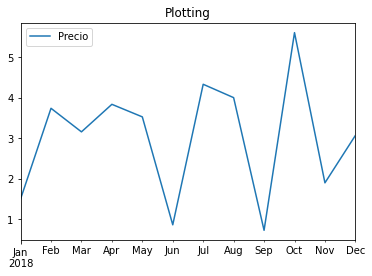

In [92]:
df.plot(title='Plotting')